In [3]:
from image_dataset import ImageDataset
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import Tensor
import torchvision.transforms as transforms
import torchvision.transforms.functional as func
import torchvision.utils as tvutil
from torch.utils.data import Dataset, DataLoader

def get_file_names(file_dir):

    files = sorted(os.listdir(file_dir))

    file_names = []

    for file in files:
        file_names.append(os.path.join(file_dir, file))

    return file_names

def convert_mask_pil_to_tensor(pil_img) -> Tensor:
    pil_img = pil_img.convert('1')
    grey = func.pil_to_tensor(pil_img).squeeze() / 255
    num_classes = 2
    target = torch.eye(num_classes)[grey.long()].permute(2, 0, 1).float()
    return target


/home/rosie/miniconda3/envs/internship/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
image_file_names = get_file_names("/home/rosie/epithelium_slides/output_images/")
mask_file_names = get_file_names("/home/rosie/epithelium_slides/output_masks/")

target = mask_file_names[0]

with Image.open(target) as im:
    test = convert_mask_pil_to_tensor(im)

print(test.size())
print(torch.max(test))

image_transforms = transforms.Compose(
    [Image.open, transforms.ToTensor()]
)
target_transforms = transforms.Compose(
    [Image.open, convert_mask_pil_to_tensor]
)

dataset = ImageDataset(
    inputs = image_file_names,
    image_transforms = image_transforms,
    targets = mask_file_names,
    target_transforms = target_transforms
)

torch.Size([2, 284, 284])
tensor(1.)


3559


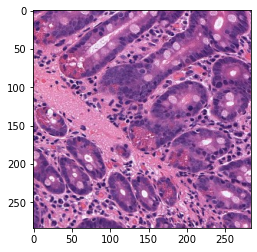

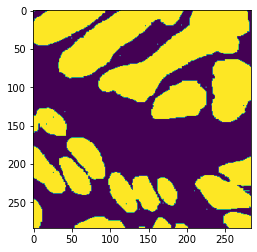

In [6]:
# Try returning one image from dataset
def get_single_image(data_set: Dataset):
    """Return a single image + target from dataset.
    Parameters
    ----------
    data_set : Dataset
        Torch dataset
    Returns
    -------
    img : Image tensor
    lab : Target tensor
    """
    n_samples = len(data_set)

    random_index = int(torch.randint(n_samples, (1,)))
    print(random_index)
    img, lab = data_set[random_index]

    return img, lab

image, label = get_single_image(dataset)

def plot_dataset_image(image, target = False):

    image_np = image.numpy().transpose(1,2,0)
    #label_np = label.numpy().transpose(1,2,0)
    if target == True:
        image_np = np.argmax(image_np, axis = 2).astype(float)
    plt.imshow(image_np)
    
#image_np = make_image_plotable(image)
#label_np = make_image_plotable(label, target = True)

plot_dataset_image(image)
plt.show()
plot_dataset_image(label, target = True)
plt.show()

#plt.imshow(image_np)
#plt.show()
#plt.imshow(label_np)
#plt.show()

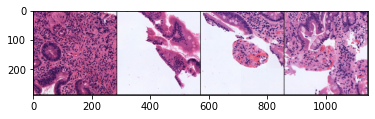

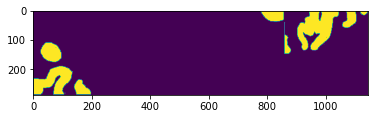

In [7]:
# Try loading into data loader
data_loader = DataLoader(
    dataset,
    batch_size=4,
    shuffle=True
)

images, labels = iter(data_loader).next()

img_grid = tvutil.make_grid(images)
plot_dataset_image(img_grid)
plt.show()

img_grid = tvutil.make_grid(labels)
plot_dataset_image(img_grid, target = True)
plt.show()

1946


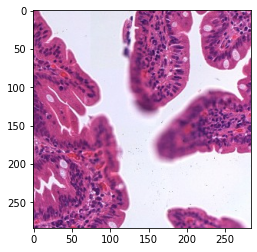

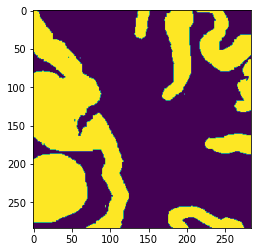

In [21]:
def epi_seg_to_pil(img_tensor):
    """Convert epithelium masks / predictions to a pillow image.
    Parameters
    ----------
    img_tensor : Tensor 
        Pixel values for one segmentation image (mask or prediction) - one-hot encoded.
        Needs to have form (1, 2, H, W).

    Returns
    -------
    pil_img : PIL Image
        PIL Image
    """
    
    img_tensor = np.argmax(img_tensor, axis=1)
    img_tensor = img_tensor * 255

    pil_img = transforms.ToPILImage()(img_tensor.type(torch.uint8))
        
    return pil_img

image, label = get_single_image(dataset)
plot_dataset_image(image)
plt.show()
plot_dataset_image(label, target = True)
plt.show()

#label = torch.unsqueeze(label,0)
label = torch.unsqueeze(label,0)
pil_image = epi_seg_to_pil(label)

pil_image.save("label_save.png")

In [26]:
type(dataset)

image_dataset.ImageDataset

In [34]:
from torchvision.datasets import VOCSegmentation

print(os.getcwd())
data_set = VOCSegmentation(
    "../data",
    #image_set="train",
    image_set="train",
    download=False,
    )

type(data_set)

/mnt/c/Users/rosie/WSL/seg-ed/images


torchvision.datasets.voc.VOCSegmentation

In [40]:
if "VOC" in str(type(dataset)):
    print("True!")
else:
    print("False!")

False!
